Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 8)         208       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 8)         1608      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 392)               0         
                                                                 
 dense (Dense)               (None, 10)                3

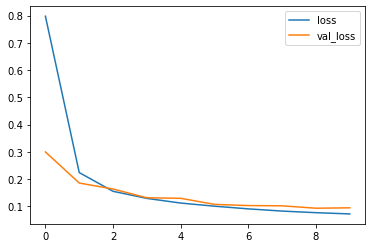

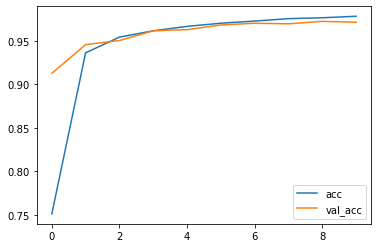

In [2]:
# -*- coding: utf-8 -*-
"""
Created on Wed Dec 26 20:24:12 2018

@author: joshua
"""
from keras.datasets import mnist
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten
from keras.models import Sequential
import matplotlib.pyplot as plt
from keras.utils import np_utils#for onehot

(x_train,y_train),(x_test,y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0],28,28,1).astype('float32')/255.0
y_train_onehot = np_utils.to_categorical(y_train)
#%%
model = Sequential()
model.add(Conv2D(filters = 8,kernel_size=(5,5),padding='same',input_shape = (28,28,1),activation='relu'))#28*28-->28*28*8(padding same)
#padding='same'-->input and output have the same shape
model.add(MaxPooling2D(pool_size = (2,2)))#14*14*8
model.add(Conv2D(filters=8,kernel_size=(5,5),padding='same',activation='relu'))#14*14*8(padding same)
model.add(MaxPooling2D(pool_size = (2,2)))#7*7*8
model.add(Flatten())
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc'])
train_history = model.fit(x=x_train,y=y_train_onehot,validation_split=0.3,epochs=10,batch_size=128,verbose=1)
#%%
plt.plot(train_history.history['loss'],label = 'loss')
plt.plot(train_history.history['val_loss'],label = 'val_loss')
plt.legend()
plt.show()
plt.plot(train_history.history['acc'],label = 'acc')
plt.plot(train_history.history['val_acc'],label = 'val_acc')
plt.legend()
plt.show()